# Relating Tallest Buildings to GDP

### Introduction
We wish to find any correlation between the quantity of buildings of a height of at least 1,300 feet in a country, with the changes in its GDP, by year. We will obtain data for tall buildings by country using the Wikipedia Page on the [Tallest Buildings in the World](https://en.wikipedia.org/wiki/List_of_tallest_buildings). Next, we will obtain data for country's GDP by year using the [MacroTrends](https://www.macrotrends.net/global-metrics/countries/WLD/world/gdp-gross-domestic-product) tool.

First, we use `BeautifulSoup` and `requests` for web scraping the Wikipedia Page on the [Tallest Buildings in the World](https://en.wikipedia.org/wiki/List_of_tallest_buildings).

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_tallest_buildings'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

Next, we will deal with the actual web scraping process. We will get the desired table in the Wikipedia page, and appropriately categorize the relevant columns into corresponding elements.

In [5]:
table = soup.find('table', {'class': 'wikitable sortable'})
headers = [_.text.strip() for _ in table.find_all('th')[1:]]
#print(headers)

building = []
city = []
country = []
height = []
floors = []
built = []


for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    building.append(cells[1].text.strip())
    city.append(cells[2].text.strip())
    country.append(cells[3].text.strip())
    height.append(cells[4].text.strip())
    floors.append(cells[6].text.strip())
    built.append(cells[7].text.strip())

We will then use `pandas` to organize the data into a CSV file.

In [6]:
buildings_df = pd.DataFrame({
    'Building': building,
    'City': city,
    'Country': country,
    'Height': height,
    'Floors': floors,
    'Year Completed': built
})

# Export the DataFrame to a CSV file
buildings_df.to_csv('tallest_buildings.csv', index=False)


### Plot of Current Count of Tall Buildings by country

Although this is not required, we will create a plot of the current count of tall buildings by country.

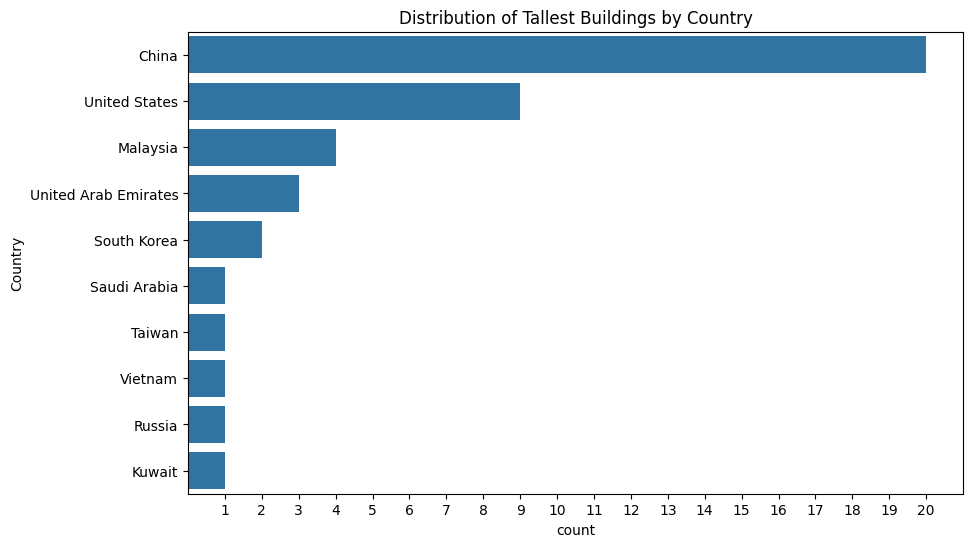

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=buildings_df, order=buildings_df['Country'].value_counts().index)
plt.title('Distribution of Tallest Buildings by Country')
plt.xticks([_ for _ in range(1,21)])
plt.show()

### Analyzing tall buildings of countries and its GDP by time

First, I wrote a function that would iterate through the [tallest_buildings.csv](tallest_buildings.csv) file to log how many tall buildings were built each year. Then, because we needed a list that would be a running count of tall buildings built until the corresponding year in time, I used the Prefix Sum Algorithm to solve this issue.

In [8]:
def getBuildingsByCountry(country):
    array = [0 for _ in range(1995, 2023)]
    df = pd.read_csv('tallest_buildings.csv')
    for row in df.itertuples(index=False, name=None):
        if row[2].strip() == country:
            if 1995 > int(row[5]):
                array[0] += 1
            if 1995 <= int(row[5]) and int(row[5]) <= 2022:
                array[int(row[5]) - 1995] += 1
    # Prefix Sum
    for i in range(1, len(array)):
        array[i] = array[i] + array[i-1]
    return array

Next, I used the [MacroTrends](https://www.macrotrends.net/global-metrics/countries/WLD/world/gdp-gross-domestic-product) tool to get GDP values per year for each country, from the years 1995 to 2022. I started by writing a Python function that used `requests` and `BeautifulSoup`, but then I quickly realized that these requests were unsuccessful because MacroTrends did not accept web scraping by that means. 
This meant that I had to write a client-side JavaScript script that would obtain the GDP values by looking at the element attributes.

JavaScript script:
```
var mainChart = document.getElementsByClassName("amcharts-graph-g1")[1];
var gElements = mainChart.querySelectorAll('circle');

var GDPs = [];
for(let i = 35; i < gElements.length; i++) {
    GDPs.push(parseFloat(gElements[i].getAttribute('aria-label').substring(6).replace(',','')));
}
```

### United States

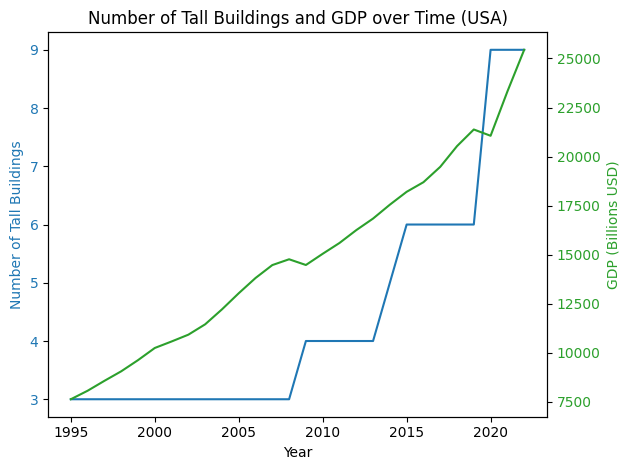

In [9]:
years = [_ for _ in range(1995,2023)]
num_buildings = getBuildingsByCountry("United States")
gdp_values = [7639.75, 8073.12, 8577.55, 9062.82, 9631.17, 10250.95, 10581.93, 10929.11, 11456.44, 12217.19, 13039.2, 13815.59, 14474.23, 14769.86, 14478.06, 15048.96, 15599.73, 16253.97, 16843.19, 17550.68, 18206.02, 18695.11, 19477.34, 20533.06, 21380.98, 21060.47, 23315.08, 25439.7]
# Obtained using above JavaScript script

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Tall Buildings', color='tab:blue')
ax1.plot(years, num_buildings, color='tab:blue', label='Tall Buildings')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('GDP (Billions USD)', color='tab:green')
ax2.plot(years, gdp_values, color='tab:green', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Number of Tall Buildings and GDP over Time (USA)')
fig.tight_layout()
plt.show()

### China

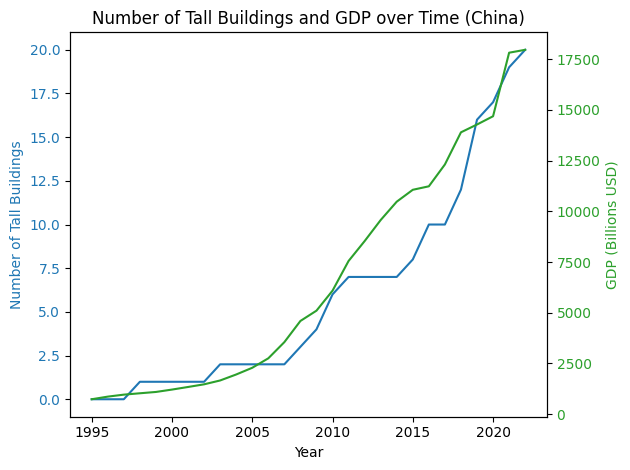

In [10]:
years = [_ for _ in range(1995,2023)]
num_buildings = getBuildingsByCountry("China")
gdp_values = [734.48, 863.75, 961.6, 1029.06, 1094.01, 1211.33, 1339.4, 1470.56, 1660.28, 1955.35, 2285.96, 2752.12, 3550.33, 4594.34, 5101.69, 6087.19, 7551.55, 8532.19, 9570.47, 10475.62, 11061.57, 11233.31, 12310.49, 13894.91, 14279.97, 14687.74, 17820.46, 17963.17]
# Obtained using above JavaScript script

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Tall Buildings', color='tab:blue')
ax1.plot(years, num_buildings, color='tab:blue', label='Tall Buildings')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('GDP (Billions USD)', color='tab:green')
ax2.plot(years, gdp_values, color='tab:green', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Number of Tall Buildings and GDP over Time (China)')
fig.tight_layout()
plt.show()

### Malaysia

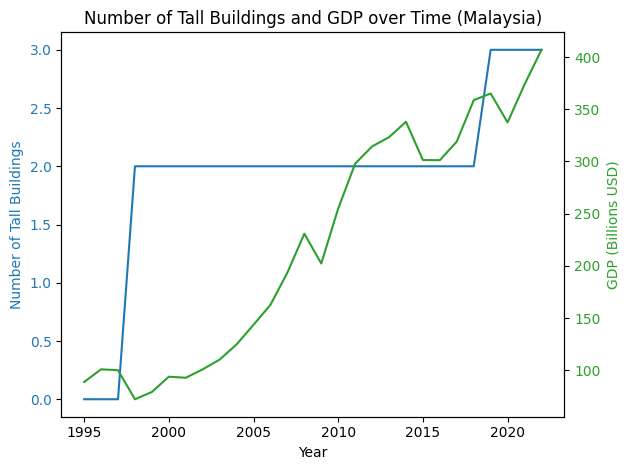

In [11]:
years = [_ for _ in range(1995,2023)]
num_buildings = getBuildingsByCountry("Malaysia")
gdp_values = [88.71, 100.86, 100.01, 72.17, 79.15, 93.79, 92.78, 100.85, 110.2, 124.75, 143.53, 162.69, 193.55, 230.81, 202.26, 255.02, 297.95, 314.44, 323.28, 338.07, 301.36, 301.26, 319.11, 358.79, 365.18, 337.46, 373.83, 407.03]
# Obtained using above JavaScript script

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Tall Buildings', color='tab:blue')
ax1.plot(years, num_buildings, color='tab:blue', label='Tall Buildings')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('GDP (Billions USD)', color='tab:green')
ax2.plot(years, gdp_values, color='tab:green', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Number of Tall Buildings and GDP over Time (Malaysia)')
fig.tight_layout()
plt.show()

### United Arab Emirates

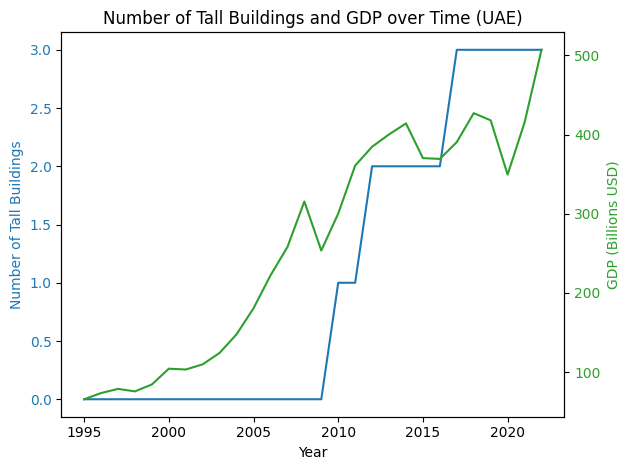

In [12]:
years = [_ for _ in range(1995,2023)]
num_buildings = getBuildingsByCountry("United Arab Emirates")
gdp_values = [65.74, 73.57, 78.84, 75.67, 84.45, 104.34, 103.31, 109.82, 124.35, 147.82, 180.62, 222.12, 257.92, 315.47, 253.55, 300.19, 360.83, 384.61, 400.22, 414.11, 370.28, 369.26, 390.52, 427.05, 417.99, 349.47, 415.18, 507.06]
# Obtained using above JavaScript script

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Tall Buildings', color='tab:blue')
ax1.plot(years, num_buildings, color='tab:blue', label='Tall Buildings')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('GDP (Billions USD)', color='tab:green')
ax2.plot(years, gdp_values, color='tab:green', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Number of Tall Buildings and GDP over Time (UAE)')
fig.tight_layout()
plt.show()